<a href="https://colab.research.google.com/github/rshaikh95/datasci_3_eda/blob/main/Week3EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Exploratory Data Analysis (EDA)

## Univariate Analysis
### Mean, Mode, Median, Range, Variance, Standard Deviation, IQR of the number of beds in Hospital Cost Report of 2019

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/Hospital_Cost_Report_2019.csv')


# Fill missing number of beds values with 0
df['Number of Beds'].fillna(0, inplace=True)

# Calculate mean, median, and mode of number of beds
meannumberbeds = df['Number of Beds'].mean()
mediannumberbeds = df['Number of Beds'].median()
modenumberbeds = df['Number of Beds'].mode().iloc[0]

# Calculate variance and standard deviation for meannumberbeds
variancenb = np.var(df['Number of Beds'])
stddeviationnb = np.std(df['Number of Beds'])

# Calculate percentiles for beds
percentile25nb = np.percentile(df['Number of Beds'], 25)
percentile75nb = np.percentile(df['Number of Beds'], 75)
iqr = percentile75nb - percentile25nb
# Calculate range for number of beds
dfrangenb = df['Number of Beds'].max() - df['Number of Beds'].min()


# Print results
print("Mean Number of Beds", meannumberbeds)
print("Median Number of Beds", mediannumberbeds)
print("Mode Number of Beds", modenumberbeds)
print("Standard Deviation", stddeviationnb)
print("Variance", variancenb)
print("25th Percentile", percentile25nb)
print("75th Percentile", percentile75nb)
print("IQR", iqr)
print("Data Range", dfrangenb)




Mean Number of Beds 144.76005230467473
Median Number of Beds 63.5
Mode Number of Beds 25.0
Standard Deviation 784.9339290190397
Variance 616121.2729252669
25th Percentile 25.0
75th Percentile 169.0
IQR 144.0
Data Range 52913.0


## Histogram of Data

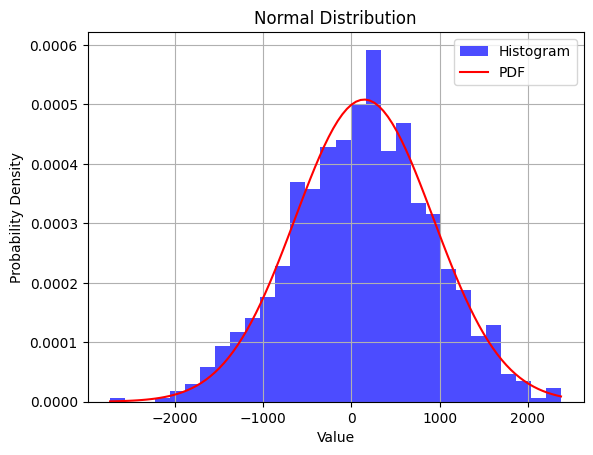

In [40]:

import numpy as np
import matplotlib.pyplot as plt

num_samples = 1000  # Number of data points

dfplot = np.random.normal(meannumberbeds, stddeviationnb, num_samples)


# Create a histogram
plt.hist(dfplot, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(dfplot), max(dfplot), 100)
pdf = (1/(stddeviationnb * np.sqrt(2*np.pi))) * np.exp(-(x - meannumberbeds)**2 / (2*stddeviationnb**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



# Bivariate Analysis

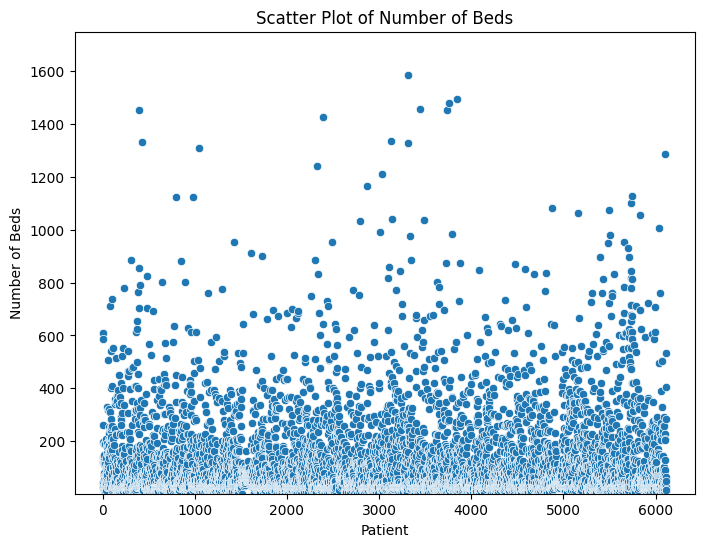

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

numbeds = df['Number of Beds']
df['Number of Beds'].fillna(0, inplace=True)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(numbeds)), y=numbeds)
plt.ylim(1, 1750)
plt.xlabel("Patient")
plt.ylabel("Number of Beds")
plt.title("Scatter Plot of Number of Beds")
plt.show()

# Handling Outliers
## Removing Outliers based on threshold

In [42]:

NumberBeds = df['Number of Beds']

# Calculate quartiles and IQR
percentile25nb = np.percentile(df['Number of Beds'], 25)
percentile75nb = np.percentile(df['Number of Beds'], 75)
iqr = percentile75nb - percentile25nb

# Set threshold for outlier detection
threshold_lower = percentile25nb - 100 * iqr
threshold_upper = percentile75nb + 100 * iqr

# Identify outliers
outliers = [x for x in NumberBeds if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [52913.0, 28401.0]


In [43]:
import pandas as pd


# Define the threshold for outlier removal
bedthreshold = 1000

# Remove data points above the bed threshold
df_cleaned = df[df['Number of Beds'] <= bedthreshold]

df_cleaned['Number of Beds']


0       120.0
1        25.0
2        44.0
3       608.0
4       196.0
        ...  
6113     15.0
6114    406.0
6115     51.0
6116     16.0
6117    284.0
Name: Number of Beds, Length: 6087, dtype: float64

# Automated Analysis

In [63]:
import pandas as pd
!pip install pandas-profiling
from pandas_profiling import ProfileReport
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK2/data/Hospital_Cost_Report_2019.csv')

# Generate the EDA report
report = ProfileReport(df.sample(1))
report.to_file('eda_report.html')




  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl (357 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)


<ipython-input-63-981393beece9>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]